In [70]:
#For data manipulation
import pandas as pd
import numpy as np

#For visualisation
import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno as msn

#For preprocessing
from sklearn.preprocessing import RobustScaler

#imputer 
from sklearn.impute import IterativeImputer

#For modeling
from sklearn.model_selection import train_test_split 
from xgboost import XGBRegressor

#For evaluation
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

#For cross-validation
from sklearn import base
from sklearn.model_selection import KFold

%matplotlib inline 

In [71]:
# importing the data

df_train = pd.read_csv('/Users/mehrac/Desktop/DSA-Python/train.csv')
df_test = pd.read_csv('/Users/mehrac/Desktop/DSA-Python/test.csv')

In [72]:
df_test

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII)
0,1007012,KK98 77,0.456086,51.562543,12236.576447,0.593325,10.414164,10.699072,0.547114,0.556267,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1007012,Reticulum III,0.529835,57.228262,3431.883825,0.675407,7.239485,5.311122,0.497688,0.409969,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1008016,Reticulum III,0.560976,59.379539,27562.914252,0.594624,11.774890,5.937797,0.544744,0.486167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1007012,Segue 1,0.565910,59.952390,20352.232905,0.837700,11.613621,10.067882,0.691641,0.523441,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1013042,Virgo I,0.588274,55.428320,23959.704016,0.520579,10.392416,6.374637,0.530676,0.580418,...,7.357729,0.583373,0.600445,0.856158,206.674424,224.104054,NaN,7.687626,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,1016064,ESO 383-087 (ISG 39),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886,1016064,NGC 247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
887,1016064,ESO 325-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
888,1016064,ESO 540-032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
df_train

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
0,990025,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.234310,0.646039,8.240543,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052590
1,990025,Camelopardalis B,0.818082,81.004994,30166.793958,0.852246,10.671823,4.742470,0.833624,0.467873,...,NaN,NaN,NaN,NaN,NaN,19.177926,NaN,22.785018,NaN,0.059868
2,990025,Virgo I,0.659443,59.570534,8441.707353,0.499762,8.840316,5.583973,0.469110,0.363837,...,NaN,NaN,NaN,NaN,NaN,21.151265,6.534020,NaN,NaN,0.050449
3,990025,UGC 8651 (DDO 181),0.555862,52.333293,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.912194,NaN,NaN,0.049394
4,990025,Tucana Dwarf,0.991196,81.802464,81033.956906,1.131163,13.800672,13.188907,0.910341,0.918353,...,NaN,NaN,NaN,NaN,NaN,NaN,5.611753,NaN,NaN,0.154247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3860,1015056,Columba I,1.029704,82.832063,34310.471408,0.855094,18.578586,10.557143,0.906573,0.862826,...,0.943410,0.902237,1.060532,124.564121,143.907576,26.438719,3.023709,29.294865,0.580785,0.042324
3861,1015056,"Leo II Dwarf (Leo B, DDO 93)",0.937869,75.877098,36899.067719,0.929494,16.153857,9.151665,0.865822,0.747577,...,0.915225,0.798083,1.055118,163.664516,184.291155,20.637654,4.470596,31.085400,0.517558,0.036725
3862,1015056,Canes Venatici I Dwarf,1.036144,93.540275,37002.977875,1.085245,21.066473,16.661344,0.983835,1.100779,...,1.097208,1.044890,1.114754,66.498714,112.887035,28.154859,5.193997,32.145570,0.363862,0.166271
3863,1015056,KKs 3,0.939034,78.274427,28180.459770,0.687655,9.388911,8.908748,0.735694,0.602703,...,0.596164,0.754729,0.825864,182.249079,175.408953,38.963157,2.854140,27.227179,0.711878,0.024187


In [74]:
df_train.shape

(3865, 80)

<Axes: >

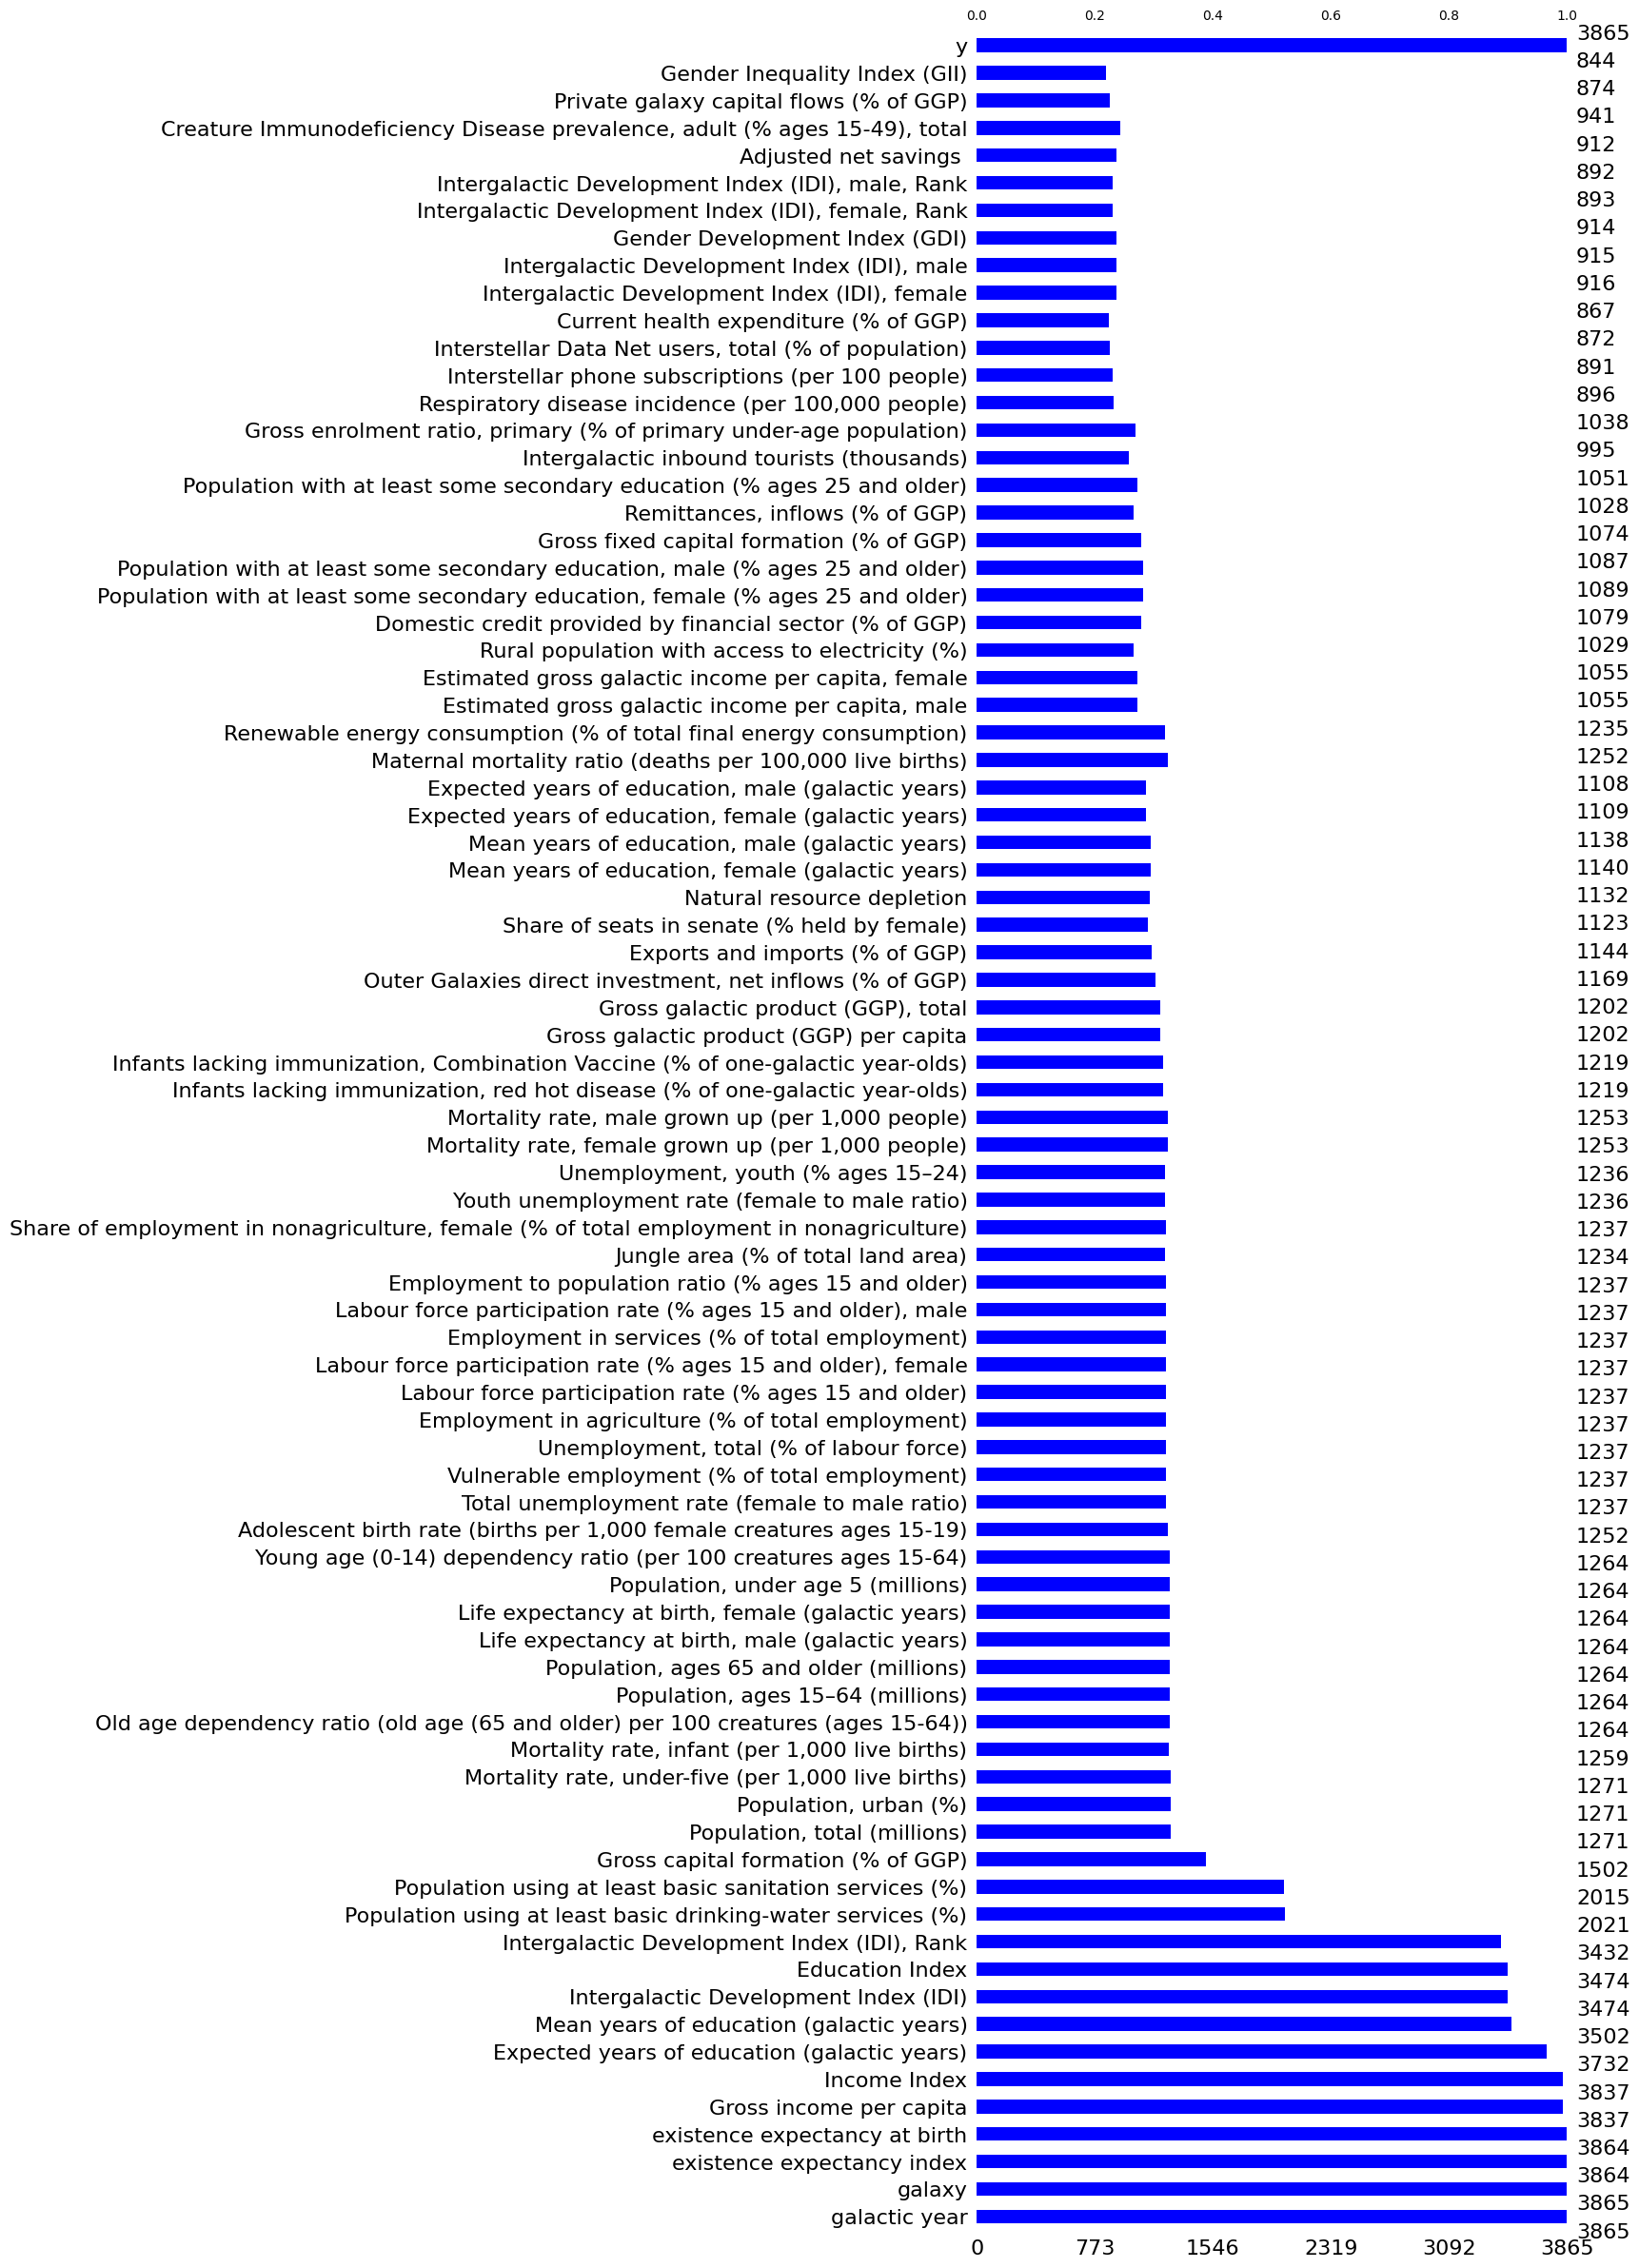

In [75]:
# cheking for missing values in train data set

msn.bar(df_train, figsize=(8, 30), color='blue')

<Axes: >

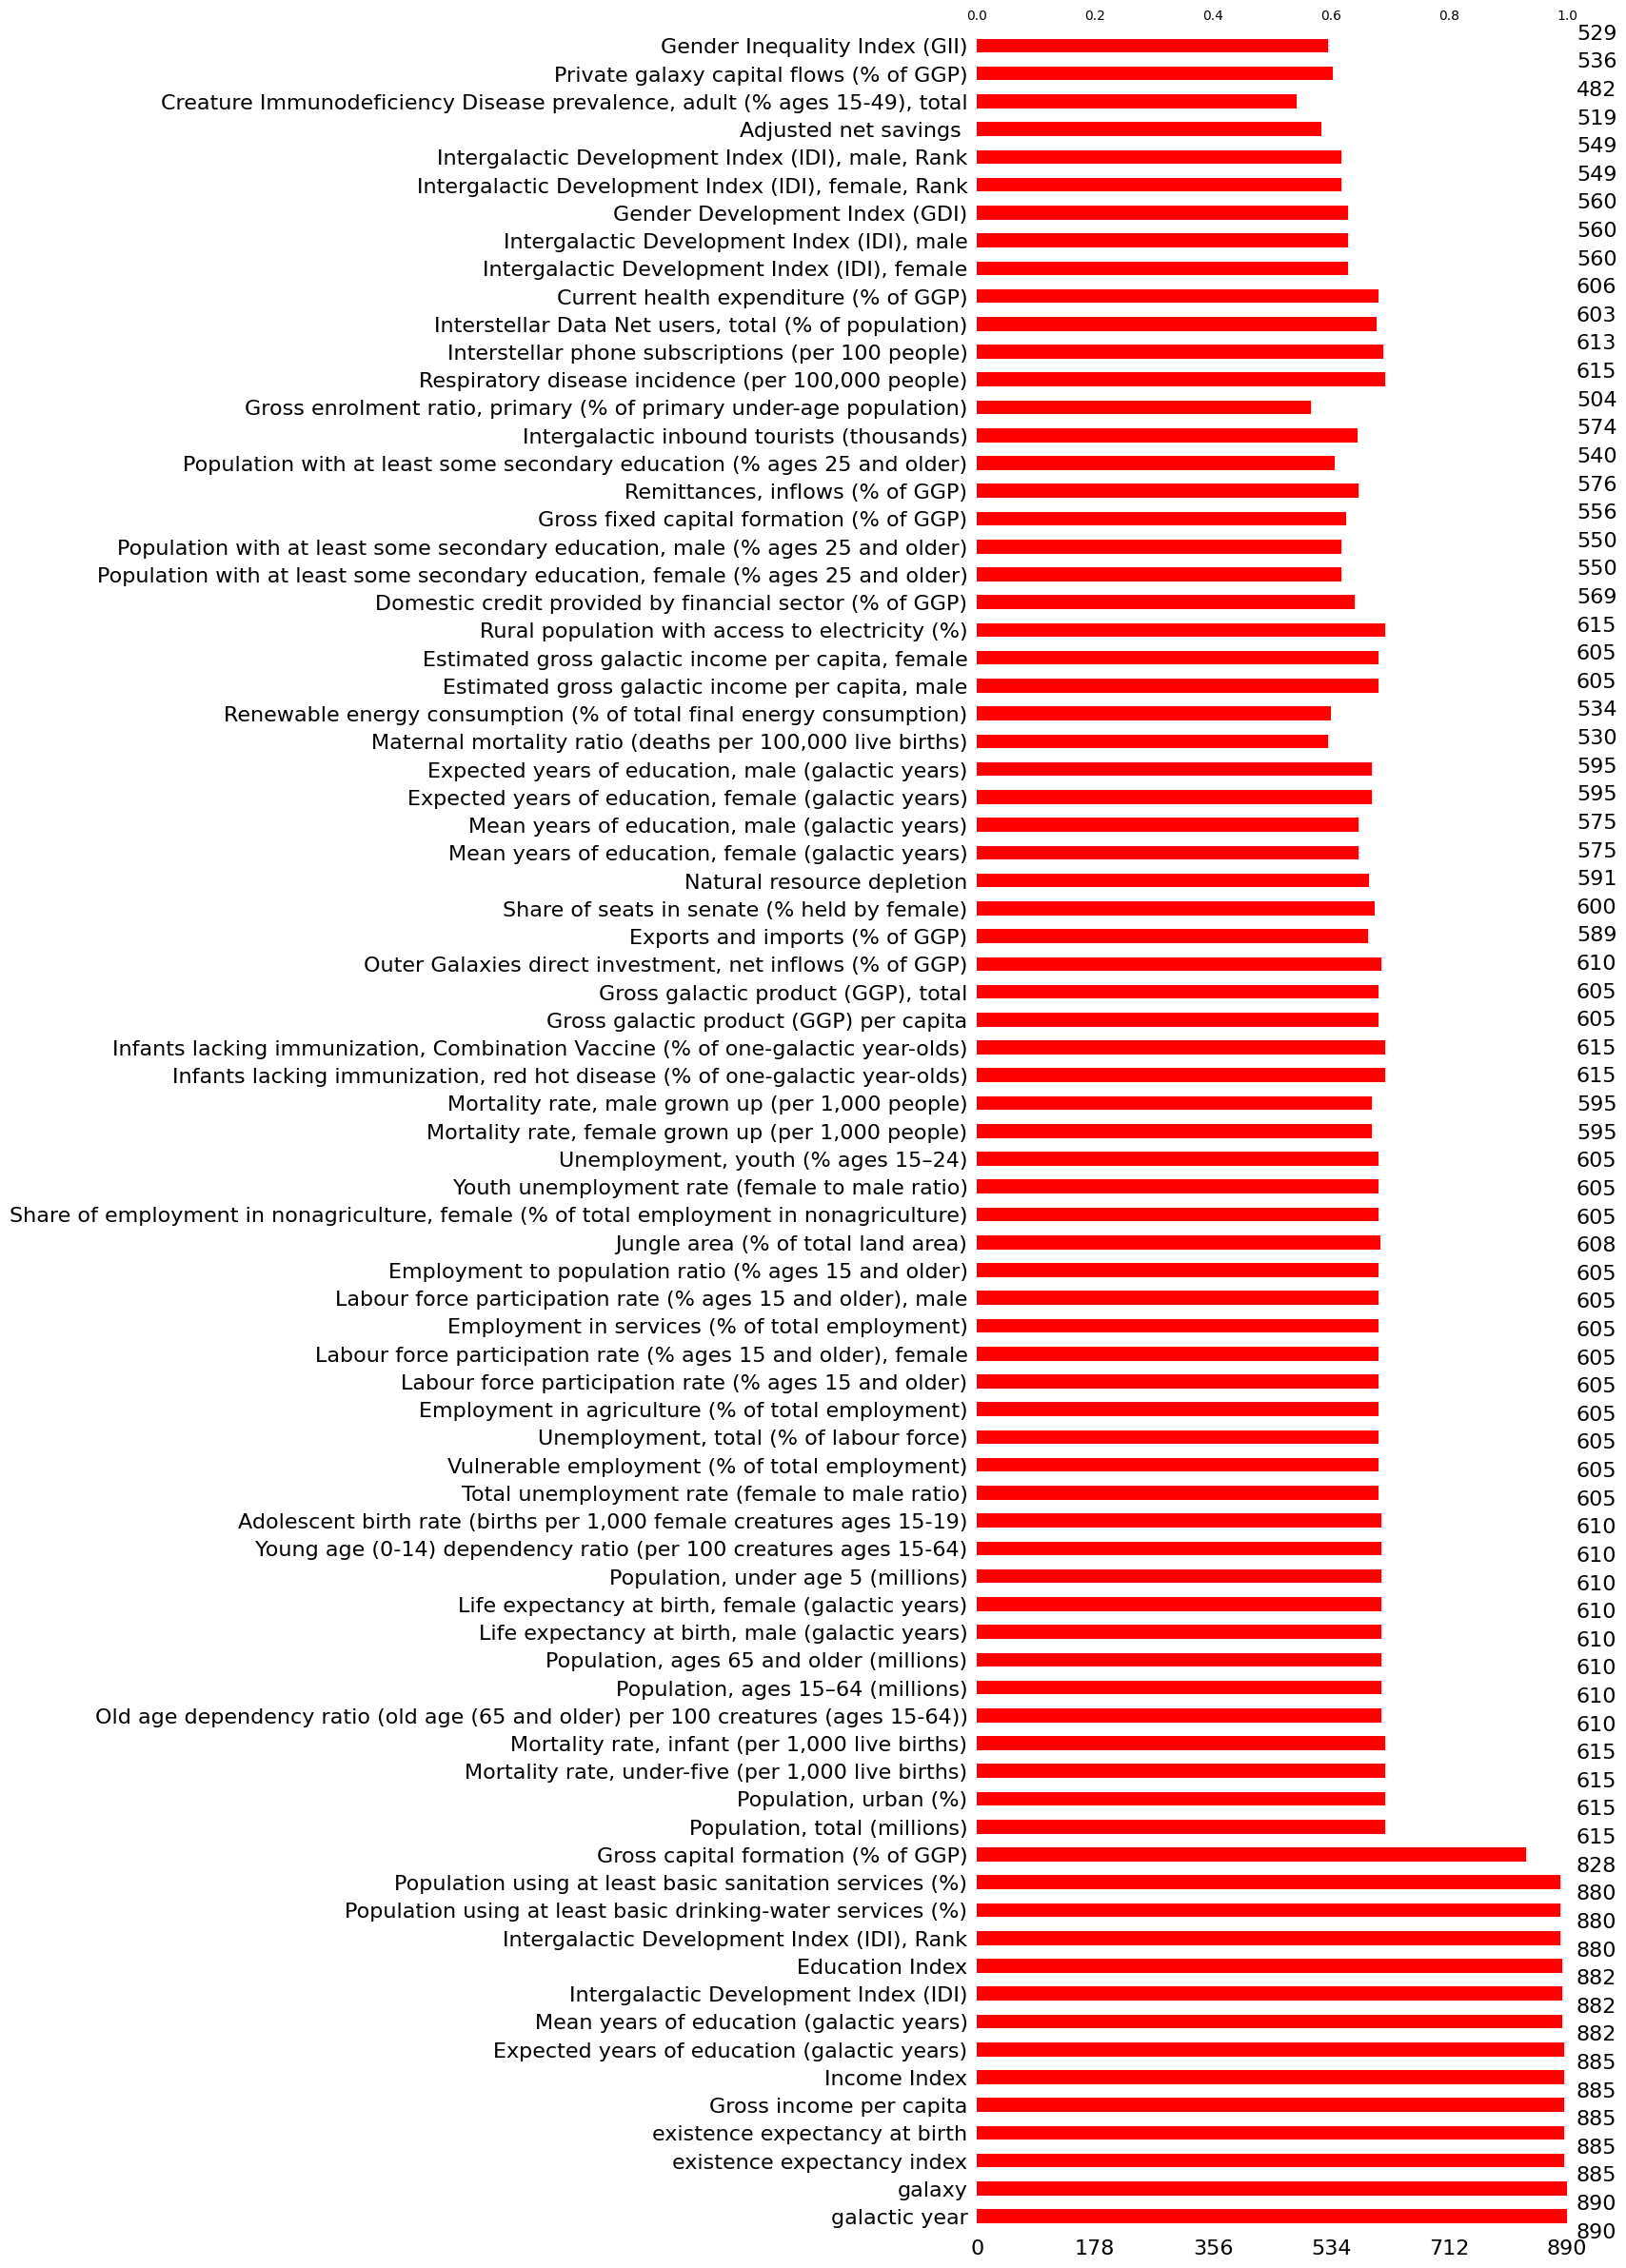

In [76]:
# # cheking for missing values in test data set

msn.bar(df_test, figsize=(8, 30), color='red')

In [77]:
display(df_train.info(), 
        df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 80 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   galactic year                                                                            3865 non-null   int64  
 1   galaxy                                                                                   3865 non-null   object 
 2   existence expectancy index                                                               3864 non-null   float64
 3   existence expectancy at birth                                                            3864 non-null   float64
 4   Gross income per capita                                                                  3837 non-null   float64
 5   Income Index                                                  

None

None

Data Cleaning and Preprocessing

In [78]:
df_train = df_train[[f for f in df_train.columns if f in df_train.iloc[:,0:11].columns or f=='y']]
df_test = df_test.iloc[:,0:11]

In [79]:
display(df_train.head(), df_test.head())


,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",y
0,990025,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.234310,0.646039,8.240543,NaN,NaN,NaN,NaN,0.052590
1,990025,Camelopardalis B,0.818082,81.004994,30166.793958,0.852246,10.671823,4.742470,0.833624,0.467873,152.522198,0.059868
2,990025,Virgo I,0.659443,59.570534,8441.707353,0.499762,8.840316,5.583973,0.469110,0.363837,209.813266,0.050449
3,990025,UGC 8651 (DDO 181),0.555862,52.333293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.049394
4,990025,Tucana Dwarf,0.991196,81.802464,81033.956906,1.131163,13.800672,13.188907,0.910341,0.918353,71.885345,0.154247


,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank"
0,1007012,KK98 77,0.456086,51.562543,12236.576447,0.593325,10.414164,10.699072,0.547114,0.556267,232.621842
1,1007012,Reticulum III,0.529835,57.228262,3431.883825,0.675407,7.239485,5.311122,0.497688,0.409969,247.580771
2,1008016,Reticulum III,0.560976,59.379539,27562.914252,0.594624,11.774890,5.937797,0.544744,0.486167,249.798771
3,1007012,Segue 1,0.565910,59.952390,20352.232905,0.837700,11.613621,10.067882,0.691641,0.523441,211.505060
4,1013042,Virgo I,0.588274,55.428320,23959.704016,0.520579,10.392416,6.374637,0.530676,0.580418,234.721069


In [80]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   galactic year                                 890 non-null    int64  
 1   galaxy                                        890 non-null    object 
 2   existence expectancy index                    885 non-null    float64
 3   existence expectancy at birth                 885 non-null    float64
 4   Gross income per capita                       885 non-null    float64
 5   Income Index                                  885 non-null    float64
 6   Expected years of education (galactic years)  885 non-null    float64
 7   Mean years of education (galactic years)      882 non-null    float64
 8   Intergalactic Development Index (IDI)         882 non-null    float64
 9   Education Index                               882 non-null    flo

In [81]:
# lest try to optimize memory usage before we train our model

def data_cleaning(data, pct_threshold=0.5): 
    
    for col in data.columns:
        col_type = data[col].dtype
        
        if col_type != 'object':
            c_min = data[col].min()
            c_max = data[col].max()
            if 'int' in str(col_type): 
                if c_min > np.iinfo(np.uint8).min and c_max < np.iinfo(np.uint8).max:
                    data[col] = data[col].astype(np.uint8)
                elif c_min > np.iinfo(np.uint16).min and c_max < np.iinfo(np.uint16).max:
                    data[col] = data[col].astype(np.uint16)
                elif c_min > np.iinfo(np.uint32).min and c_max < np.iinfo(np.uint32).max:
                    data[col] = data[col].astype(np.uint32)
                elif c_min > np.iinfo(np.uint64).min and c_max < np.iinfo(np.uint64).max:
                    data[col] = data[col].astype(np.uint64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    data[col] = data[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    data[col] = data[col].astype(np.float32)
                else:
                    data[col] = data[col].astype(np.float64)
        
        elif col_type=='object':
            if data[col].nunique() / data[col].shape[0] < pct_threshold:  
                data[col] = data[col].astype('category') 
            else:
                continue

In [82]:
data_cleaning(df_train)


/var/folders/rv/wpnq3fw11xj73scqdshzpm000000gn/T/ipykernel_9332/665206965.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].astype(np.uint32)
/var/folders/rv/wpnq3fw11xj73scqdshzpm000000gn/T/ipykernel_9332/665206965.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].astype('category')
/var/folders/rv/wpnq3fw11xj73scqdshzpm000000gn/T/ipykernel_9332/665206965.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

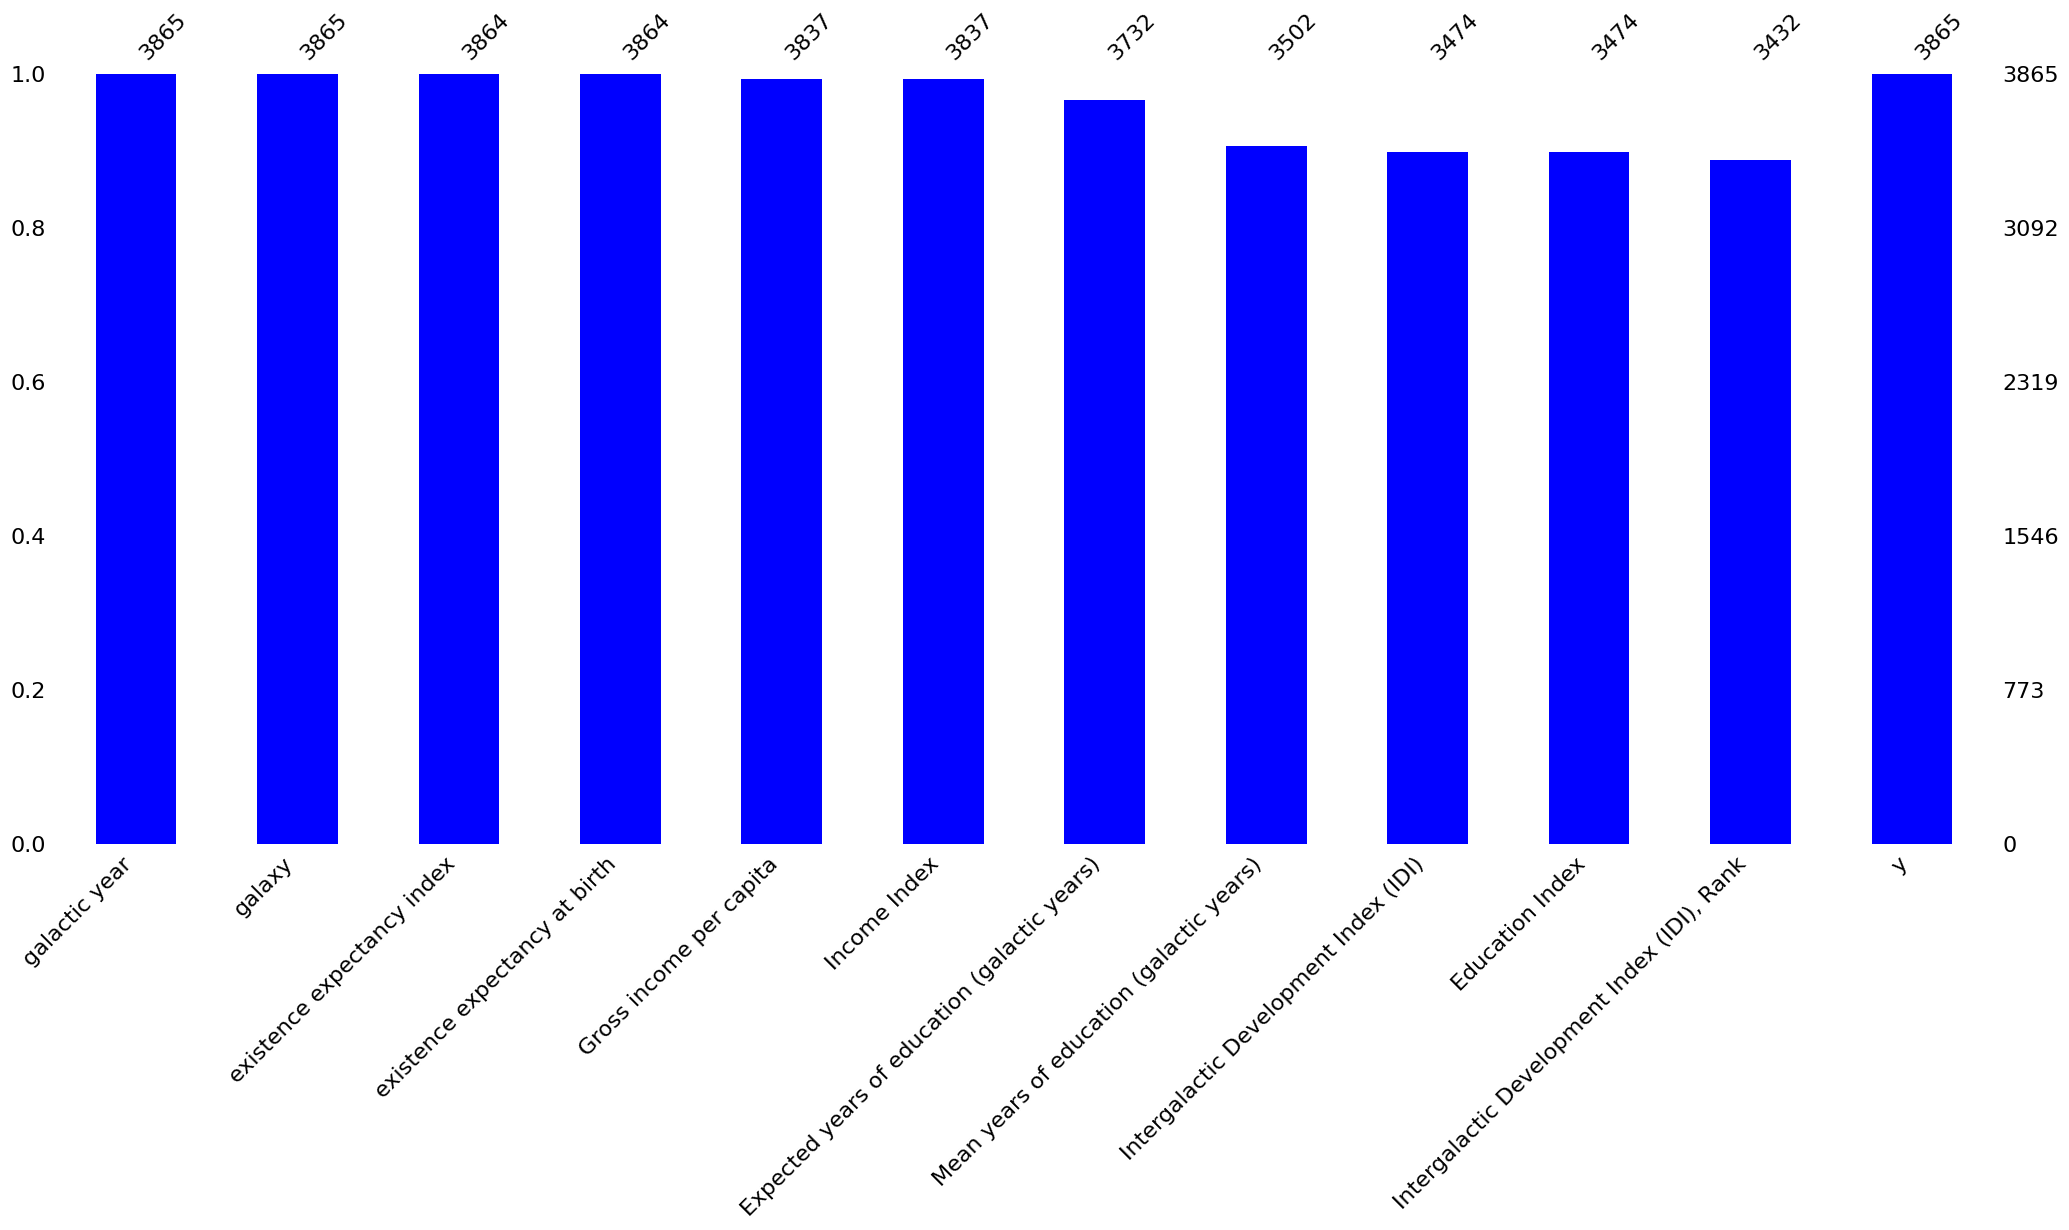

In [83]:
#Null value count of the training set after the elimination
msn.bar(df_train, color='blue')
plt.show()

In [84]:
data_cleaning(df_test)

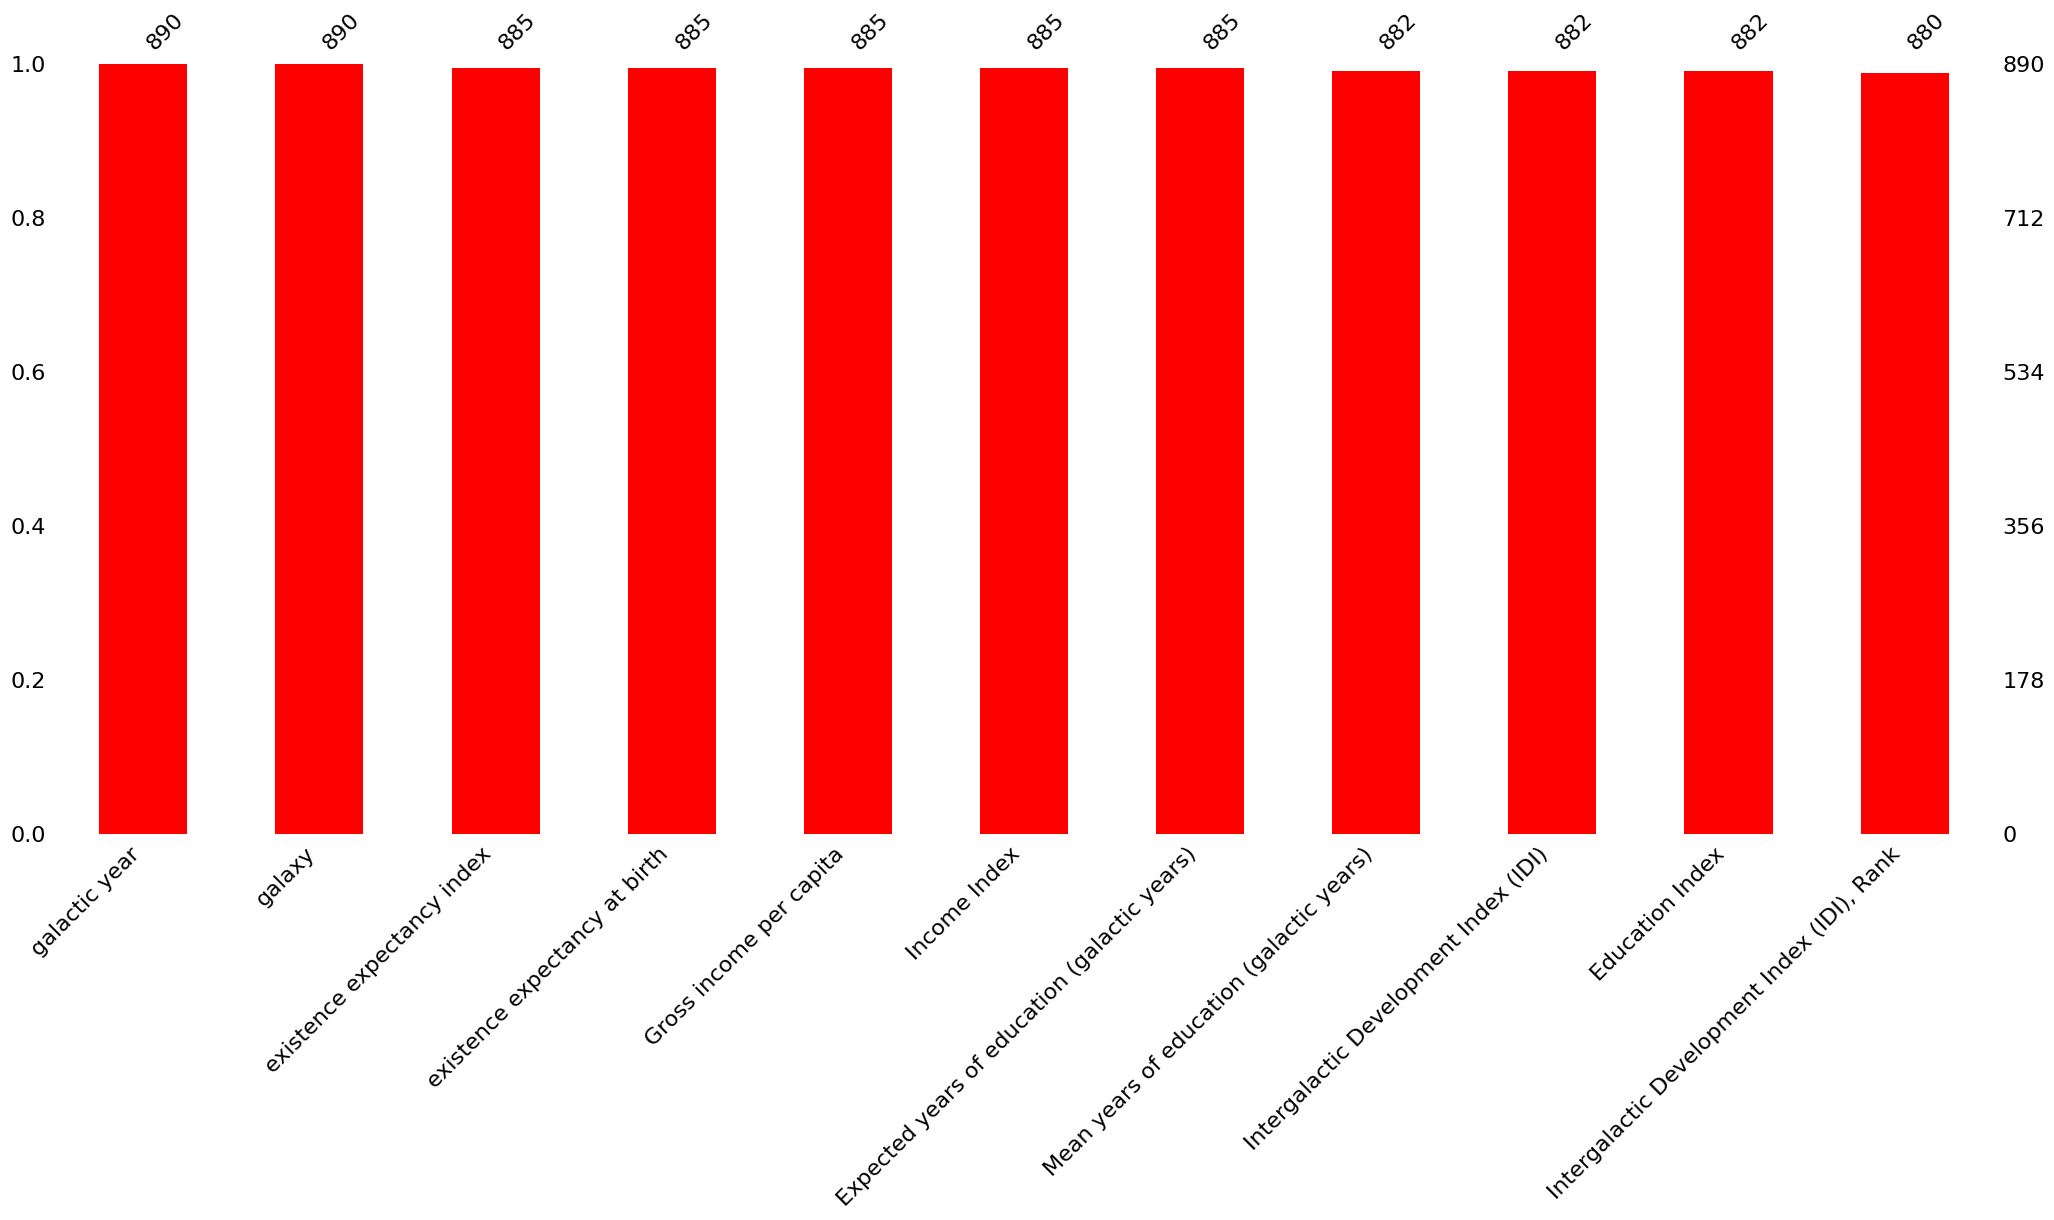

In [85]:
msn.bar(df_test, color='red')
plt.show()

In [86]:
# lets check the missing values ratio per column

def column_null_ratio(data):
    ratio = []
    for f in data.columns:
        n_missing = data[f].isna().sum()
        ratio.append(n_missing / data.shape[0])
    return ratio

display(column_null_ratio(df_train),
        column_null_ratio(df_test))

[0.0,
 0.0,
 0.000258732212160414,
 0.000258732212160414,
 0.007244501940491591,
 0.007244501940491591,
 0.034411384217335056,
 0.09391979301423027,
 0.10116429495472186,
 0.10116429495472186,
 0.11203104786545925,
 0.0]

[0.0,
 0.0,
 0.0056179775280898875,
 0.0056179775280898875,
 0.0056179775280898875,
 0.0056179775280898875,
 0.0056179775280898875,
 0.008988764044943821,
 0.008988764044943821,
 0.008988764044943821,
 0.011235955056179775]

In [87]:
# lets clean up column names 

def column_names_alter(data):
    data.rename(columns=lambda x: x.lower().replace(' ', '_').replace('-', '_').replace(',', ''), inplace=True)
    return print(f'Column names cleaned: {df_train.columns}')
column_names_alter(df_train)
column_names_alter(df_test)

Column names cleaned: Index(['galactic_year', 'galaxy', 'existence_expectancy_index',
       'existence_expectancy_at_birth', 'gross_income_per_capita',
       'income_index', 'expected_years_of_education_(galactic_years)',
       'mean_years_of_education_(galactic_years)',
       'intergalactic_development_index_(idi)', 'education_index',
       'intergalactic_development_index_(idi)_rank', 'y'],
      dtype='object')
Column names cleaned: Index(['galactic_year', 'galaxy', 'existence_expectancy_index',
       'existence_expectancy_at_birth', 'gross_income_per_capita',
       'income_index', 'expected_years_of_education_(galactic_years)',
       'mean_years_of_education_(galactic_years)',
       'intergalactic_development_index_(idi)', 'education_index',
       'intergalactic_development_index_(idi)_rank', 'y'],
      dtype='object')


/var/folders/rv/wpnq3fw11xj73scqdshzpm000000gn/T/ipykernel_9332/986618349.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns=lambda x: x.lower().replace(' ', '_').replace('-', '_').replace(',', ''), inplace=True)


In [88]:
# lets strip the columns so they do not contain any white spaces in  names 
def values_stripper(data):
    for f in data.columns:
        if data[f].dtype == 'O':
            data[f] = data[f].str.strip()
            print(f'The unique values for {f} variable: {df_train[f].unique()}\n')
values_stripper(df_train)            
values_stripper(df_test) 

In [89]:
# lets check for duplicates values

def duplicate_check_remove(data):
    num_duplicates = data.duplicated().sum()
    if num_duplicates > 0:
        print(f'The number of duplicate rows before: {num_duplicates}')
        data.drop_duplicates(inplace = True)
        print(f'The number of duplicate rows now: {data.duplicated().sum()}')
    else:
        print('There are no duplicate rows in the dataset.')
duplicate_check_remove(df_test)
duplicate_check_remove(df_train)       

There are no duplicate rows in the dataset.
There are no duplicate rows in the dataset.


In [90]:
# There are lots of categorical variables in the dataset, thats why we might use k-folds encoding instead of one-hot encoding

display(df_train['galactic_year'].value_counts().to_frame().T,  
        df_train['galaxy'].value_counts().to_frame().T)

galactic_year,990025,999000,1006009,1005006,1004004,991020,1002001,1001000,1000000,1003002,...,992016,1007012,1008016,1009020,1010025,1011030,1012036,1013042,1014049,1015056
count,181,180,180,180,180,180,180,180,180,180,...,180,90,90,90,90,90,90,89,88,87


galaxy,Andromeda XII,Andromeda XIX[60],Andromeda XXII[57],Tucana Dwarf,Andromeda XXIV,Pegasus III,Pisces IV (Andromeda XIV),Eridanus II,Cassiopeia III (Andromeda XXXII),Cetus III,...,Andromeda III,Perseus I (Andromeda XXXIII),Andromeda XVII,Andromeda X,Sagittarius Dwarf Irregular Galaxy (SagDIG),Andromeda XXI[57],Aquarius Dwarf Galaxy (DDO 210),Pegasus Dwarf Irregular (DDO 216),"Wolf-Lundmark-Melotte (WLM, DDO 221)",NGC 5253
count,26,26,26,26,26,25,25,25,25,25,...,18,18,18,17,17,17,17,17,17,1


In [91]:
# lets check if there are same categories in both train and test dataset
separate_gal = [f for f in set(df_test['galaxy'].to_list()) 
            if f not in set(df_train['galaxy'].to_list())]
print(f'Test set contains {len(separate_gal)} values that train does not') 

Test set contains 0 values that train does not


In [92]:
separate_year = [f for f in set(df_test['galactic_year'].to_list())  
            if f not in set(df_train['galactic_year'].to_list())]
print(f'Test set contains {len(separate_year)} values that train does not')

Test set contains 1 values that train does not


In [93]:
# lets romive this category from the test set to avoid overfitting, beause it is not present in train set
df_test[df_test['galaxy']=='NGC 5253'] 

,galactic_year,galaxy,existence_expectancy_index,existence_expectancy_at_birth,gross_income_per_capita,income_index,expected_years_of_education_(galactic_years),mean_years_of_education_(galactic_years),intergalactic_development_index_(idi),education_index,intergalactic_development_index_(idi)_rank


In [94]:
df_train = df_train[df_train['galaxy']!='NGC 5253']


In [95]:
# lets change galactic year to object type 
df_train['galactic_year'] = df_train['galactic_year'].astype('O') 
df_test['galactic_year'] = df_test['galactic_year'].astype('O') 

In [96]:
# using k-fold target encoder class replace the values with each categories' mean

class KFoldTargetEncoderTrain(base.BaseEstimator, base.TransformerMixin):
   
    def __init__(self,colnames,targetName,
                  n_fold=5, verbosity=True,
                  discardOriginal_col=False):
        self.colnames = colnames
        self.targetName = targetName
        self.n_fold = n_fold
        self.verbosity = verbosity
        self.discardOriginal_col = discardOriginal_col
        
    def fit(self, X, y=None):
        return self
    
    def transform(self,X):        
        assert(type(self.targetName) == str)
        assert(type(self.colnames) == str)
        assert(self.colnames in X.columns)
        assert(self.targetName in X.columns)       
        
        mean_of_target = X[self.targetName].mean()
        kf = KFold(n_splits = self.n_fold,
                   shuffle = True)        
        col_mean_name = self.colnames + '_' + 'Kfold_Target_Enc'
        X[col_mean_name] = np.nan       
        
        for tr_ind, val_ind in kf.split(X):
            X_tr, X_val = X.iloc[tr_ind], X.iloc[val_ind]
            X.loc[X.index[val_ind], col_mean_name] = X_val[self.colnames].map(X_tr.groupby(self.colnames)[self.targetName].mean())
            X[col_mean_name].fillna(mean_of_target, inplace = True)  #Fill in the place that has become nan with the global mean
            
        if self.verbosity:            
            encoded_feature = X[col_mean_name].values
            print('Correlation between the new feature, {} and, {} is {}.'.format(col_mean_name,self.targetName, 
                                                                                  np.corrcoef(X[self.targetName].values,encoded_feature)[0][1]))
        if self.discardOriginal_col:
            X = X.drop(self.targetName, axis=1)
        return X

In [97]:
# train set

for f in df_train.columns[0:2]:
    targetc = KFoldTargetEncoderTrain(f, 'y', n_fold=5)
    df_t = targetc.fit_transform(df_train) 

Correlation between the new feature, galactic_year_Kfold_Target_Enc and, y is -0.08104645895155332.
Correlation between the new feature, galaxy_Kfold_Target_Enc and, y is 0.9611561935267113.


In [98]:
df_train = pd.concat([df_train.iloc[:,2:].drop('y', axis=1), df_train['y']], axis=1)  

In [99]:
df_train.head()


,existence_expectancy_index,existence_expectancy_at_birth,gross_income_per_capita,income_index,expected_years_of_education_(galactic_years),mean_years_of_education_(galactic_years),intergalactic_development_index_(idi),education_index,intergalactic_development_index_(idi)_rank,galactic_year_Kfold_Target_Enc,galaxy_Kfold_Target_Enc,y
0,0.628418,63.12500,27109.234375,0.645996,8.242188,NaN,NaN,NaN,NaN,0.082395,0.048440,0.052582
1,0.817871,81.00000,30166.794922,0.852051,10.671875,4.742188,0.833496,0.467773,152.500,0.081691,0.058516,0.059875
2,0.659668,59.56250,8441.707031,0.499756,8.843750,5.582031,0.468994,0.363770,209.875,0.084024,0.040930,0.050446
3,0.555664,52.34375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.081719,0.040104,0.049408
4,0.991211,81.81250,81033.953125,1.130859,13.796875,13.187500,0.910156,0.918457,71.875,0.084024,0.220157,0.154297


In [100]:
class KFoldTargetEncoderTest(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self,train,colNames,encodedName):
        
        self.train = train
        self.colNames = colNames
        self.encodedName = encodedName
        
        
    def fit(self, X, y=None):
        return self

    def transform(self,X):


        mean = self.train[[self.colNames,self.encodedName]].groupby(self.colNames).mean().reset_index() 
        
        dd = {}
        for index, row in mean.iterrows():
            dd[row[self.colNames]] = row[self.encodedName]

        
        X[self.encodedName] = X[self.colNames]
        X = X.replace({self.encodedName: dd})

        return X

In [101]:
# test set

test_targetc = KFoldTargetEncoderTest(df_t, 'galactic_year', 'galactic_year_Kfold_Target_Enc')
df_test = test_targetc.fit_transform(df_test)
test_targetc = KFoldTargetEncoderTest(df_t, 'galaxy', 'galaxy_Kfold_Target_Enc')
df_test = test_targetc.fit_transform(df_test) 

In [102]:
df_test = df_test.iloc[:,2:]

In [103]:
df_test.head()

,existence_expectancy_index,existence_expectancy_at_birth,gross_income_per_capita,income_index,expected_years_of_education_(galactic_years),mean_years_of_education_(galactic_years),intergalactic_development_index_(idi),education_index,intergalactic_development_index_(idi)_rank,galactic_year_Kfold_Target_Enc,galaxy_Kfold_Target_Enc
0,0.456055,51.56250,12236.576172,0.593262,10.414062,10.695312,0.546875,0.556152,232.625,0.082000,0.045928
1,0.529785,57.21875,3431.883789,0.675293,7.238281,5.312500,0.497803,0.409912,247.625,0.082000,0.042737
2,0.561035,59.37500,27562.914062,0.594727,11.773438,5.937500,0.544922,0.486084,249.750,0.080359,0.042737
3,0.565918,59.93750,20352.232422,0.837891,11.617188,10.070312,0.691406,0.523438,211.500,0.082000,0.043767
4,0.588379,55.43750,23959.703125,0.520508,10.390625,6.375000,0.530762,0.580566,234.750,0.098391,0.042763


In [104]:
# lets impute the data

imputer = IterativeImputer(random_state=123, n_nearest_features=15, max_iter=3693, verbose = 1)

In [105]:
#imputing train
df_imputed = imputer.fit_transform(df_train)
df_imputed = pd.DataFrame(df_imputed, columns=df_train.columns)

df_train=df_imputed
df_train.isnull().sum()


[IterativeImputer] Completing matrix with shape (3864, 12)
[IterativeImputer] Change: 3523.6894651165517, scaled tolerance: 151.0726875 
[IterativeImputer] Change: 6256.7295121311045, scaled tolerance: 151.0726875 
[IterativeImputer] Change: 5729.559940607998, scaled tolerance: 151.0726875 
[IterativeImputer] Change: 3015.451996689822, scaled tolerance: 151.0726875 
[IterativeImputer] Change: 1857.0850690822638, scaled tolerance: 151.0726875 
[IterativeImputer] Change: 1231.763178081698, scaled tolerance: 151.0726875 
[IterativeImputer] Change: 857.6839146134855, scaled tolerance: 151.0726875 
[IterativeImputer] Change: 615.4262806740873, scaled tolerance: 151.0726875 
[IterativeImputer] Change: 449.77012203910135, scaled tolerance: 151.0726875 
[IterativeImputer] Change: 332.2860363395684, scaled tolerance: 151.0726875 
[IterativeImputer] Change: 247.02547143501704, scaled tolerance: 151.0726875 
[IterativeImputer] Change: 184.28906831551012, scaled tolerance: 151.0726875 
[IterativeI

existence_expectancy_index                      0
existence_expectancy_at_birth                   0
gross_income_per_capita                         0
income_index                                    0
expected_years_of_education_(galactic_years)    0
mean_years_of_education_(galactic_years)        0
intergalactic_development_index_(idi)           0
education_index                                 0
intergalactic_development_index_(idi)_rank      0
galactic_year_Kfold_Target_Enc                  0
galaxy_Kfold_Target_Enc                         0
y                                               0
dtype: int64

In [106]:
#imputing test
df_imputed = imputer.fit_transform(df_test)
df_imputed = pd.DataFrame(df_imputed, columns=df_test.columns)

df_test=df_imputed
df_test.isnull().sum()


[IterativeImputer] Completing matrix with shape (890, 11)
[IterativeImputer] Change: 3509.561437419178, scaled tolerance: 1016.064 
[IterativeImputer] Change: 684.231136062616, scaled tolerance: 1016.064 
[IterativeImputer] Early stopping criterion reached.


existence_expectancy_index                      0
existence_expectancy_at_birth                   0
gross_income_per_capita                         0
income_index                                    0
expected_years_of_education_(galactic_years)    0
mean_years_of_education_(galactic_years)        0
intergalactic_development_index_(idi)           0
education_index                                 0
intergalactic_development_index_(idi)_rank      0
galactic_year_Kfold_Target_Enc                  0
galaxy_Kfold_Target_Enc                         0
dtype: int64

In [107]:
# final check for null values after imputation

display(df_train.isnull().sum(), df_test.isnull().sum())

existence_expectancy_index                      0
existence_expectancy_at_birth                   0
gross_income_per_capita                         0
income_index                                    0
expected_years_of_education_(galactic_years)    0
mean_years_of_education_(galactic_years)        0
intergalactic_development_index_(idi)           0
education_index                                 0
intergalactic_development_index_(idi)_rank      0
galactic_year_Kfold_Target_Enc                  0
galaxy_Kfold_Target_Enc                         0
y                                               0
dtype: int64

existence_expectancy_index                      0
existence_expectancy_at_birth                   0
gross_income_per_capita                         0
income_index                                    0
expected_years_of_education_(galactic_years)    0
mean_years_of_education_(galactic_years)        0
intergalactic_development_index_(idi)           0
education_index                                 0
intergalactic_development_index_(idi)_rank      0
galactic_year_Kfold_Target_Enc                  0
galaxy_Kfold_Target_Enc                         0
dtype: int64

In [108]:
# checking cleaned data

display(df_train.head().T, df_test.head().T)


,0,1,2,3,4
existence_expectancy_index,0.628418,0.817871,0.659668,0.555664,0.991211
existence_expectancy_at_birth,63.125000,81.000000,59.562500,52.343750,81.812500
gross_income_per_capita,27109.234375,30166.794922,8441.707031,14331.989847,81033.953125
income_index,0.645996,0.852051,0.499756,0.540338,1.130859
expected_years_of_education_(galactic_years),8.242188,10.671875,8.843750,9.491347,13.796875
mean_years_of_education_(galactic_years),5.875372,4.742188,5.582031,5.799796,13.187500
intergalactic_development_index_(idi),0.547525,0.833496,0.468994,0.488196,0.910156
education_index,0.441768,0.467773,0.363770,0.451762,0.918457
intergalactic_development_index_(idi)_rank,191.335924,152.500000,209.875000,210.990061,71.875000
galactic_year_Kfold_Target_Enc,0.082395,0.081691,0.084024,0.081719,0.084024


,0,1,2,3,4
existence_expectancy_index,0.456055,0.529785,0.561035,0.565918,0.588379
existence_expectancy_at_birth,51.562500,57.218750,59.375000,59.937500,55.437500
gross_income_per_capita,12236.576172,3431.883789,27562.914062,20352.232422,23959.703125
income_index,0.593262,0.675293,0.594727,0.837891,0.520508
expected_years_of_education_(galactic_years),10.414062,7.238281,11.773438,11.617188,10.390625
mean_years_of_education_(galactic_years),10.695312,5.312500,5.937500,10.070312,6.375000
intergalactic_development_index_(idi),0.546875,0.497803,0.544922,0.691406,0.530762
education_index,0.556152,0.409912,0.486084,0.523438,0.580566
intergalactic_development_index_(idi)_rank,232.625000,247.625000,249.750000,211.500000,234.750000
galactic_year_Kfold_Target_Enc,0.082000,0.082000,0.080359,0.082000,0.098391


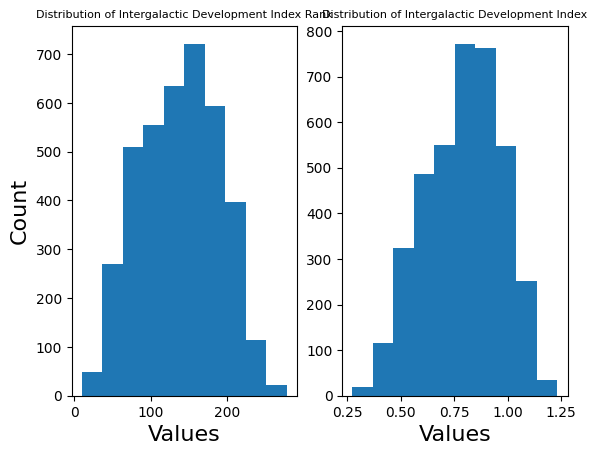

In [109]:
# figuring out which correlation test to employ depending on the normality of the following columns

plt.subplot(1, 2, 2)
plt.hist(df_train['intergalactic_development_index_(idi)'])
plt.title(label = 'Distribution of Intergalactic Development Index', fontsize = 8)
plt.xlabel(xlabel = 'Values', fontsize = 16)
plt.ylabel(ylabel = 'Count', fontsize = 16)

plt.subplot(1, 2, 1)
plt.hist(df_train['intergalactic_development_index_(idi)_rank'])
plt.title(label = 'Distribution of Intergalactic Development Index Rank', fontsize = 8)
plt.xlabel(xlabel = 'Values', fontsize = 16)
plt.ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

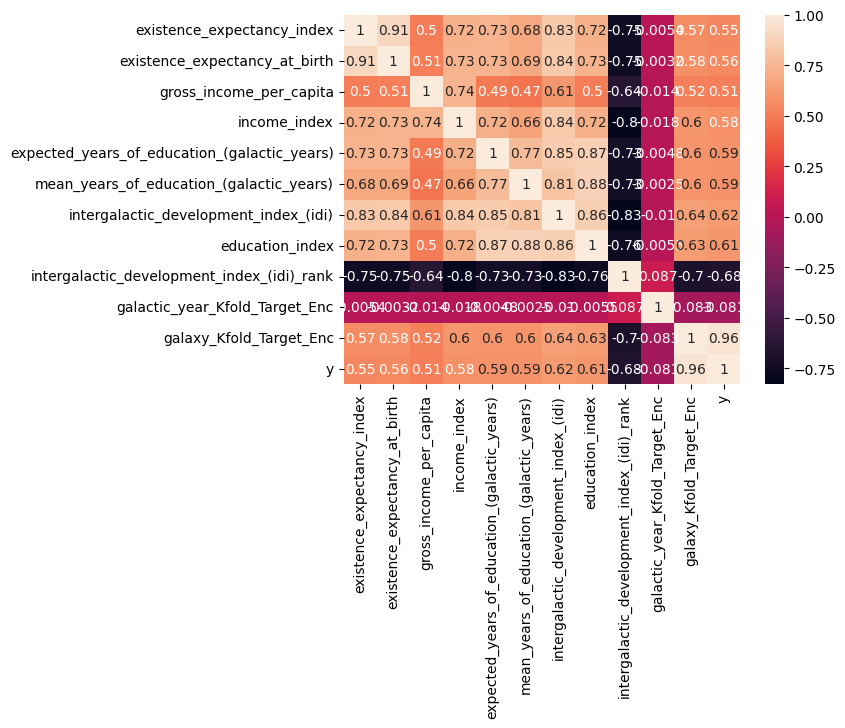

In [110]:
# due to little skewness of the data, we can suggest using pearson corrleation to test the 
# corrlation among the variables and we can see that there is high correlation among the variables so using linear
# regression to find the 'y' column is should be avoided so far.  
sns.heatmap(df_train.corr(method='pearson'), annot=True)
plt.show()

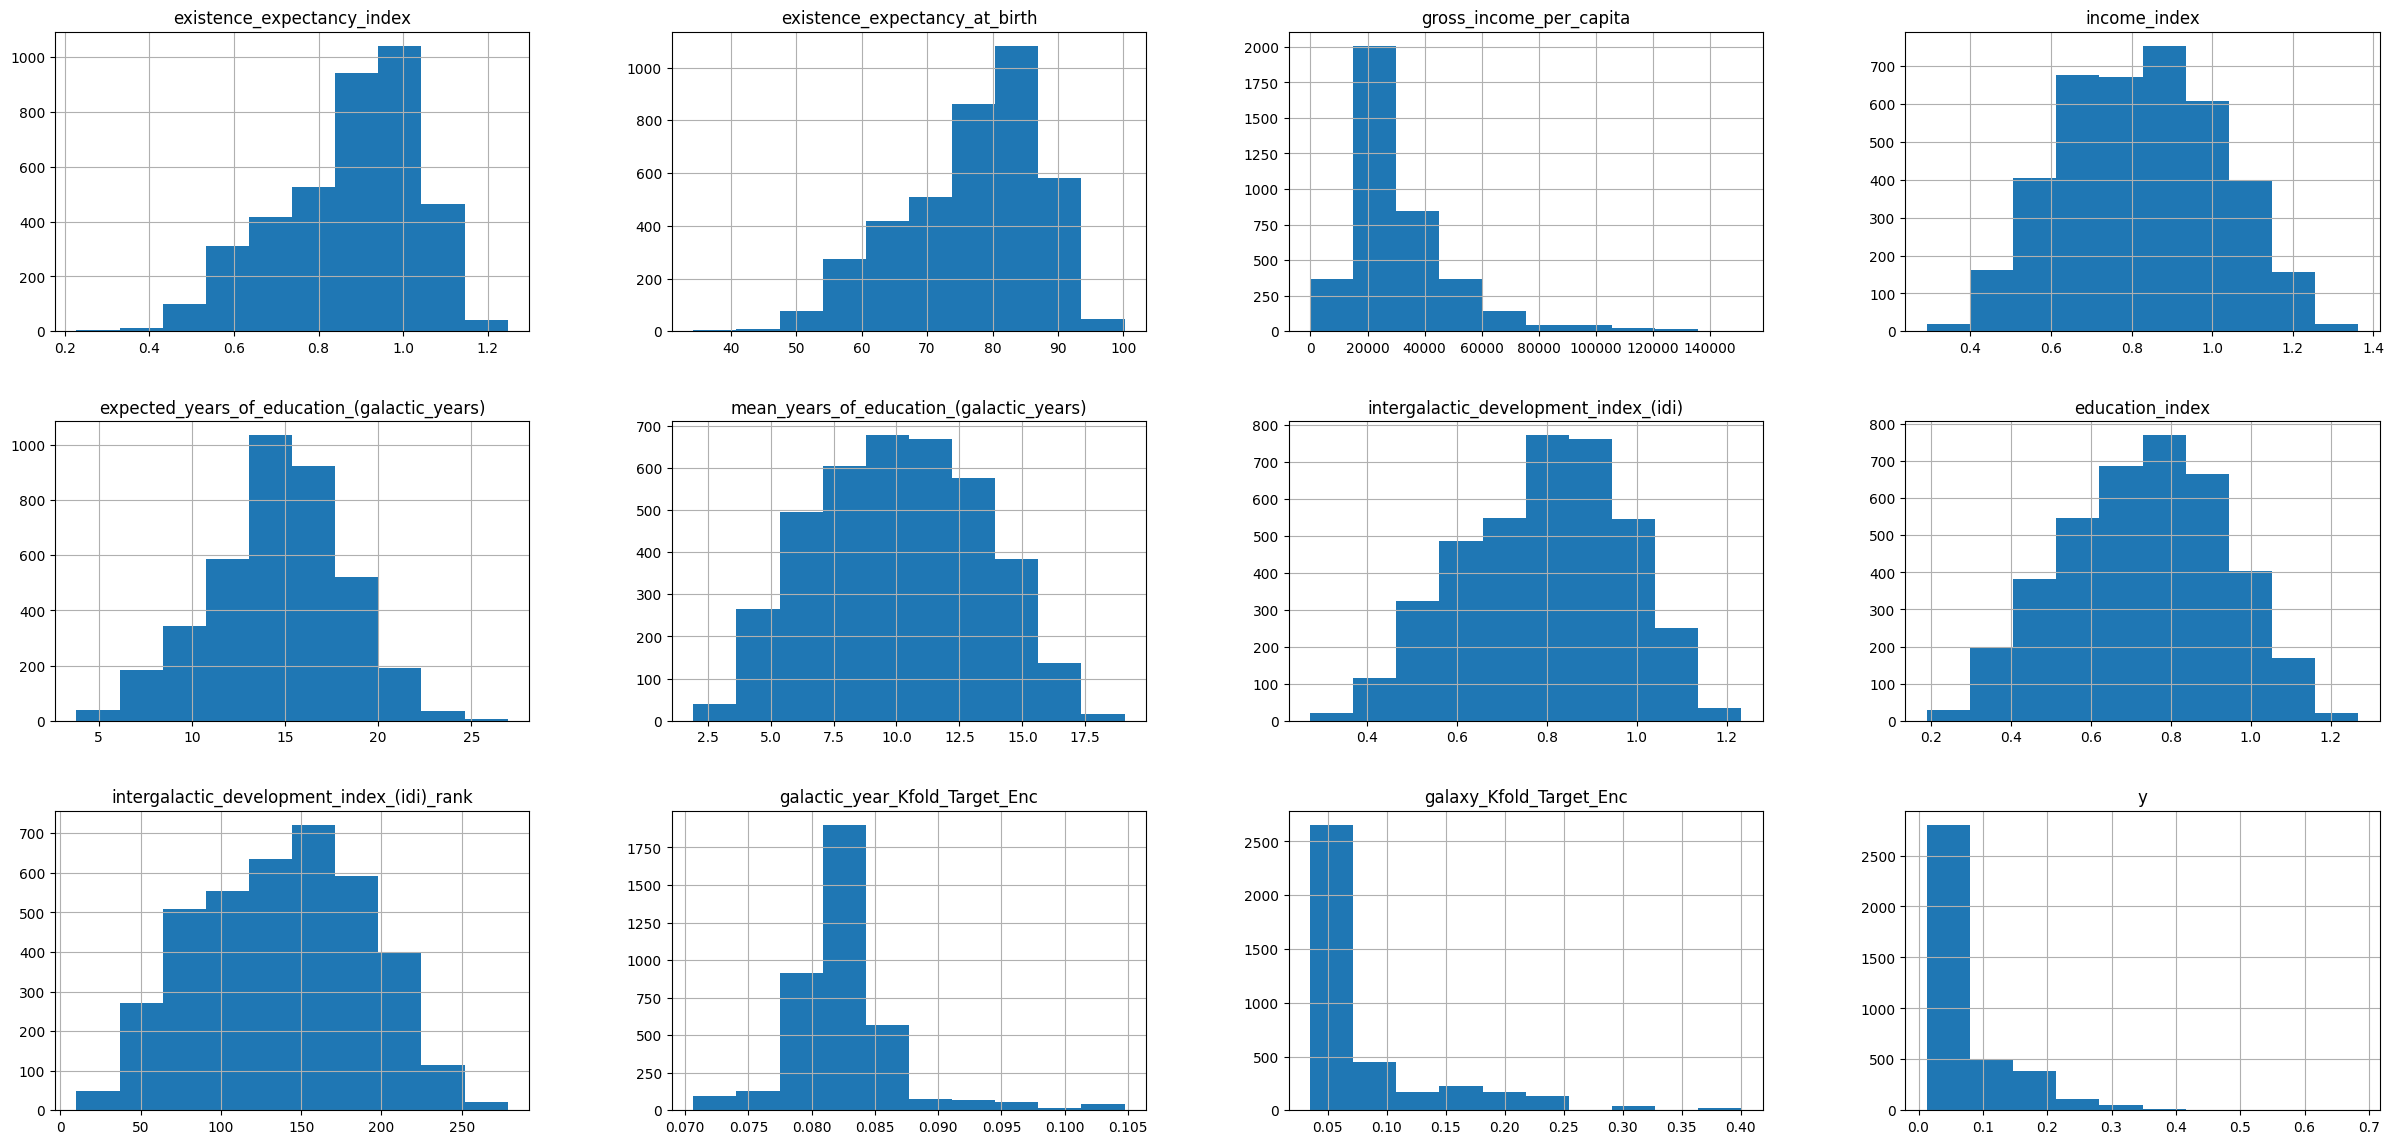

In [111]:
df_train.hist(figsize=(30,100), layout=(20,4))
plt.show()

We can see that there is a huge imbalance in target variable. Other columns also have imbalance, for this reason we can use XGBoost for modeling.

In [112]:
# lets scale both test and train data sets

scaler = RobustScaler()
df_train.iloc[:,:-1] = scaler.fit_transform(df_train.iloc[:,:-1])
df_train = pd.DataFrame(df_train)  


scaler = RobustScaler()
df_test.iloc[:,:] = scaler.fit_transform(df_test.iloc[:,:])
df_test = pd.DataFrame(df_test)  

In [113]:
display(df_train.head(), df_test.head())

,existence_expectancy_index,existence_expectancy_at_birth,gross_income_per_capita,income_index,expected_years_of_education_(galactic_years),mean_years_of_education_(galactic_years),intergalactic_development_index_(idi),education_index,intergalactic_development_index_(idi)_rank,galactic_year_Kfold_Target_Enc,galaxy_Kfold_Target_Enc,y
0,-1.213603,-1.085470,0.032653,-0.617243,-1.466667,-0.833484,-1.008728,-1.030256,0.627678,0.046578,-0.212091,0.052582
1,-0.388948,0.136752,0.214499,0.085798,-0.928139,-1.056764,0.085981,-0.942005,0.141619,-0.162668,0.030284,0.059875
2,-1.077577,-1.329060,-1.077584,-1.116202,-1.333333,-0.891283,-1.309346,-1.294946,0.859707,0.530950,-0.392772,0.050446
3,-1.530287,-1.822650,-0.727264,-0.977740,-1.189797,-0.848376,-1.235842,-0.996341,0.873663,-0.154430,-0.412631,0.049408
4,0.365569,0.192308,3.239783,1.037068,-0.235498,0.607273,0.379439,0.587407,-0.867459,0.530950,3.918819,0.154297


,existence_expectancy_index,existence_expectancy_at_birth,gross_income_per_capita,income_index,expected_years_of_education_(galactic_years),mean_years_of_education_(galactic_years),intergalactic_development_index_(idi),education_index,intergalactic_development_index_(idi)_rank,galactic_year_Kfold_Target_Enc,galaxy_Kfold_Target_Enc
0,-2.594805,-2.402516,-0.817126,-0.962393,-1.290198,-0.108578,-1.192950,-0.856796,0.899900,0.034883,-0.286104
1,-2.202597,-1.947170,-1.262501,-0.675214,-1.992574,-1.106044,-1.379406,-1.341424,1.060596,0.034883,-0.364743
2,-2.036364,-1.773585,-0.041861,-0.957265,-0.989550,-0.990228,-1.200371,-1.088997,1.083361,-0.073165,-0.364743
3,-2.010390,-1.728302,-0.406605,-0.105983,-1.024107,-0.224394,-0.643785,-0.965210,0.673586,0.034883,-0.339366
4,-1.890909,-2.090566,-0.224125,-1.217094,-1.295382,-0.909157,-1.254174,-0.775890,0.922665,1.113911,-0.364109


In [114]:
X = df_train.drop("y",axis=1)
y = df_train.y

In [115]:
# lets split the train data to train and test sets 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,shuffle=True,random_state=42)

1) Predicting the target index

In [116]:
# lets fit the data into the model

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

In [117]:
# lets print the results 

print("R2 score:",r2_score(y_test,y_pred))
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred))
print("MAE: ",mean_absolute_error(y_test,y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))


# R2: a value of 0.9582 indicates that approximately 97.65% of the variance 
# in the target variable is explained by the model. This is a good result.

# MAPE: a value of 0.0594 indicates a 5.57% absolute percentage error in the predictions. 
# This can be considered good because we need to aim for low MAPE

# MAE: a value of 0.0048 shows an absolute error of 0.0042 in the original scale of the target variable. 
# This can be considered good, as lower MAE values indicate better accuracy.

# RMSE: value of 0.0126 indicates a difference of 0.0095 in the original scale.
# 0.0095 is pretty good result.

R2 score: 0.9808095172562035
MAPE: 0.05188035134530749
MAE:  0.004160934147135965
RMSE:  0.008549827305082046


In [118]:
# lets try our model on the test data 

new_prediction = xgb_model.predict(df_test)

In [119]:
df_test['new_prediction'] = pd.Series(new_prediction).to_frame()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


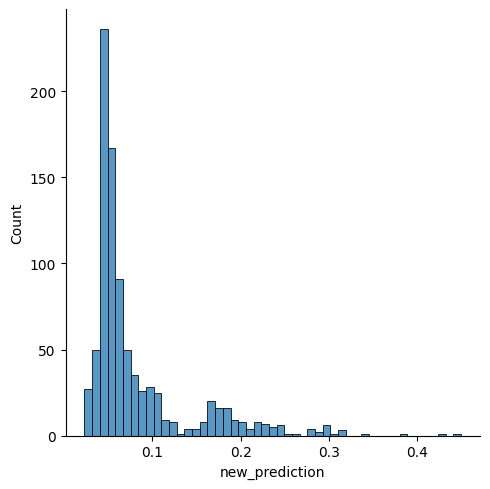

In [120]:
# The distribution of our predicted target variable has similar distribution to our test data 

sns.displot(df_test['new_prediction'])
plt.show()

In [121]:
df_train

,existence_expectancy_index,existence_expectancy_at_birth,gross_income_per_capita,income_index,expected_years_of_education_(galactic_years),mean_years_of_education_(galactic_years),intergalactic_development_index_(idi),education_index,intergalactic_development_index_(idi)_rank,galactic_year_Kfold_Target_Enc,galaxy_Kfold_Target_Enc,y
0,-1.213603,-1.085470,0.032653,-0.617243,-1.466667,-0.833484,-1.008728,-1.030256,0.627678,0.046578,-0.212091,0.052582
1,-0.388948,0.136752,0.214499,0.085798,-0.928139,-1.056764,0.085981,-0.942005,0.141619,-0.162668,0.030284,0.059875
2,-1.077577,-1.329060,-1.077584,-1.116202,-1.333333,-0.891283,-1.309346,-1.294946,0.859707,0.530950,-0.392772,0.050446
3,-1.530287,-1.822650,-0.727264,-0.977740,-1.189797,-0.848376,-1.235842,-0.996341,0.873663,-0.154430,-0.412631,0.049408
4,0.365569,0.192308,3.239783,1.037068,-0.235498,0.607273,0.379439,0.587407,-0.867459,0.530950,3.918819,0.154297
...,...,...,...,...,...,...,...,...,...,...,...,...
3859,0.531350,0.260684,0.460941,0.095793,0.824242,0.088513,0.366355,0.398509,0.046187,1.590305,0.192000,0.042328
3860,0.133900,-0.213675,0.614895,0.350687,0.287446,-0.188570,0.209346,0.007457,0.294936,-1.610932,-0.026665,0.036713
3861,0.561105,0.995726,0.621075,0.880466,1.374892,1.290745,0.661682,1.205468,-0.969540,-2.319313,1.103078,0.166260
3862,0.138151,-0.051282,0.096363,-0.475635,-1.212121,-0.236290,-0.287850,-0.484673,0.945752,1.590305,-0.222008,0.024185


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


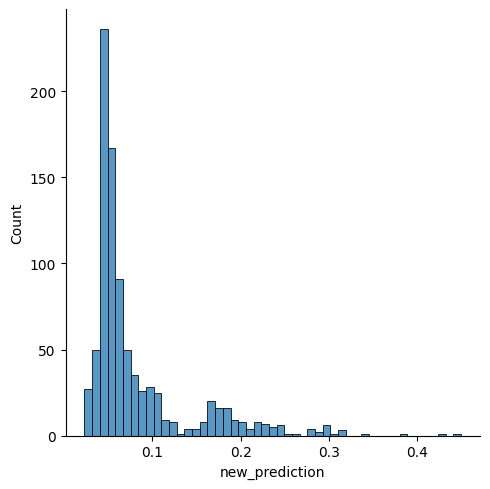

In [122]:
# our prediction has a similar distribution to the target variable from train data, as seen below.

sns.displot(df_test['new_prediction'])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


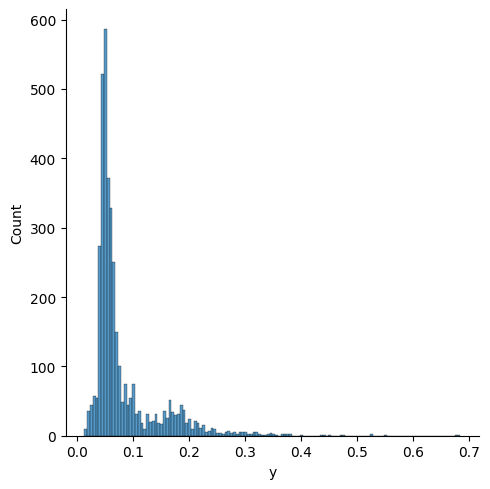

In [123]:
sns.displot(df_train['y'])
plt.show()

2) Optimising the energy allocation.

In [124]:
# the index represent the y_pred 

index = df_test['new_prediction']
pot_inc = -np.log(index+0.01)+3
p2= pot_inc**2
df_test["p2"] = p2

In [125]:
ss = df_test.drop(df_test.iloc[:, 0:11],axis = 1)
ss

,new_prediction,p2
0,0.049144,33.963116
1,0.046903,34.414837
2,0.045228,34.766129
3,0.047887,34.213829
4,0.045177,34.777176
...,...,...
885,0.034058,37.481976
886,0.045075,34.798874
887,0.066045,31.096601
888,0.052913,33.246708


In [126]:
# lets sort values using Likelyincreasing index

ss=ss.sort_values('p2',ascending=False)

# lets drop the old index 
ss=ss.reset_index(drop=False)

In [127]:
ss['opt_pred']=0
ss

,index,new_prediction,p2,opt_pred
0,163,0.023235,41.013157,0
1,156,0.023366,40.962936,0
2,88,0.023595,40.875092,0
3,522,0.023616,40.867409,0
4,57,0.024172,40.657948,0
...,...,...,...,...
885,779,0.318030,16.930359,0
886,808,0.340902,16.380219,0
887,730,0.380374,15.528715,0
888,772,0.430924,14.583871,0


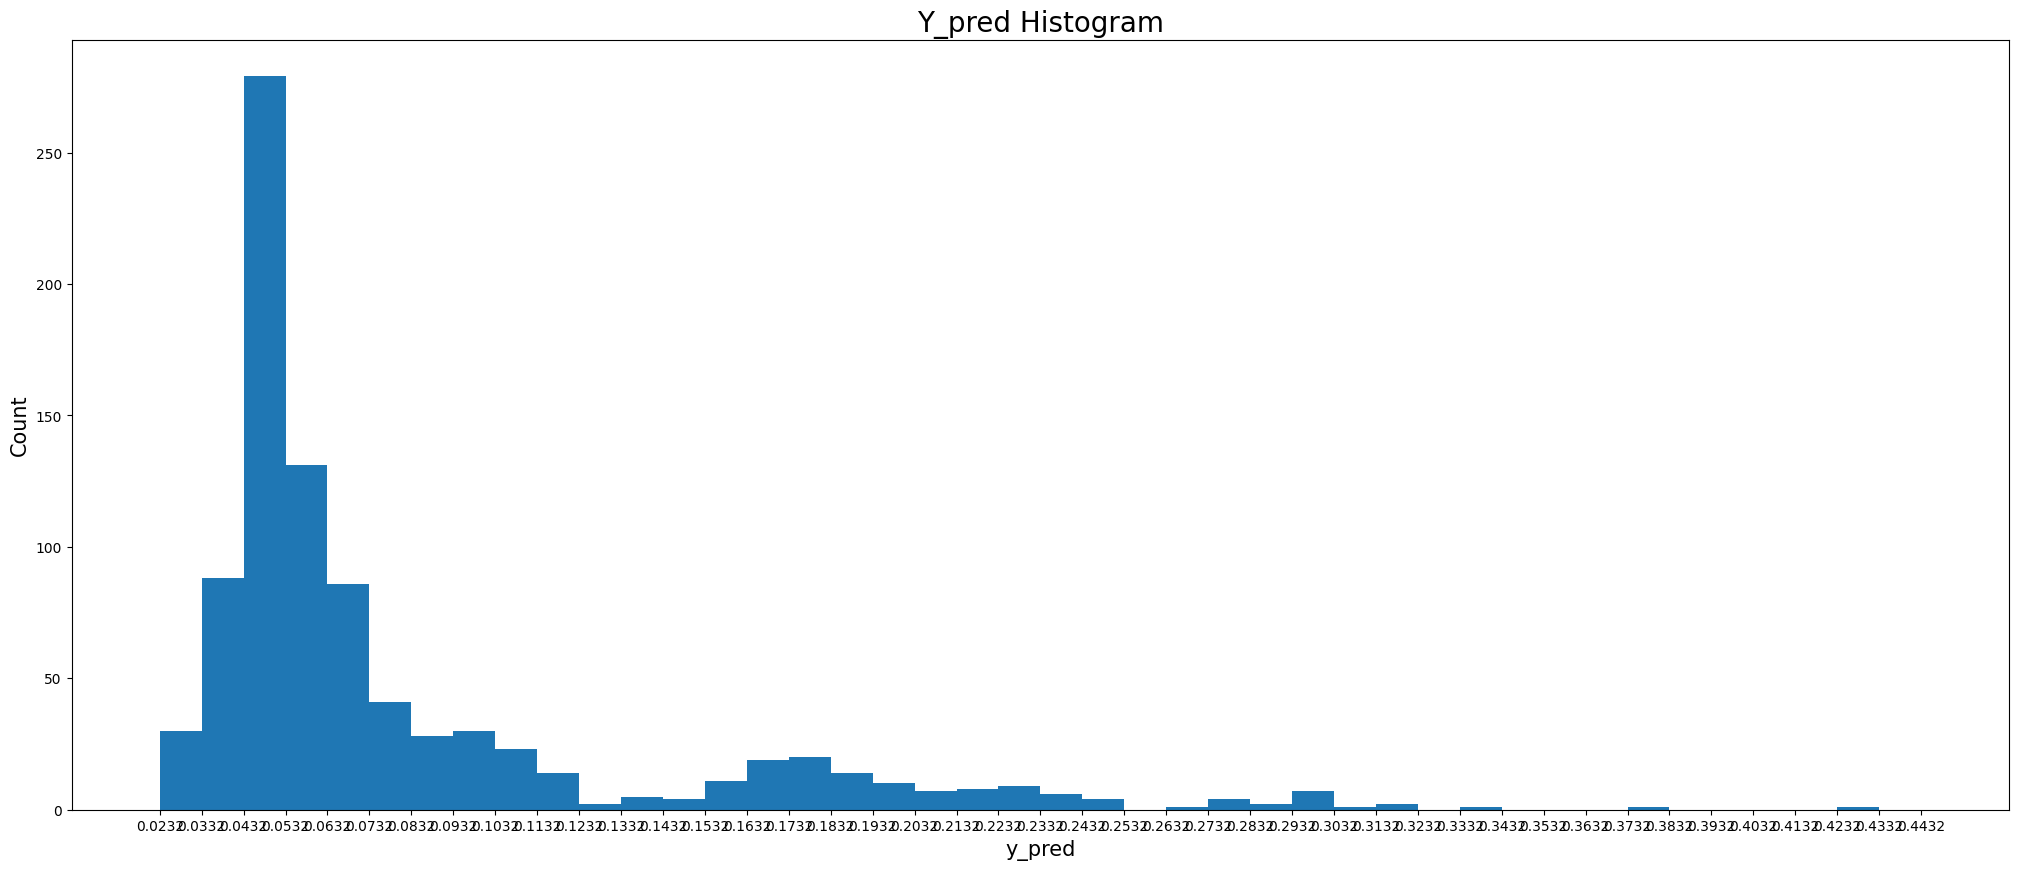

In [128]:
y_pred=ss.new_prediction
x = np.arange(y_pred.min(),y_pred.max(),0.01)
plt.figure(figsize=(25,10))
plt.hist(y_pred,bins=x)
plt.title('Y_pred Histogram',fontsize=20)
plt.xlabel('y_pred',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(x)
plt.show()

In [129]:
n = 340
# we are going to give the max of Energy to the 340 first element (ordered using the likely Increasing Index)
ss.opt_pred[:n]=100
ss.opt_pred[n:] = 0
c=100
alpha = 0.62685
for i in range(n,374):
    if c>=alpha: 
        c=c-alpha
        ss.loc[i,'opt_pred'] =c
alpha=0.067345
for i in range(374,455):
    if c>=alpha:
        c=c-alpha
        ss.loc[i,'opt_pred'] =c
    else:
        ss.loc[i,'opt_pred'] = 0
alpha = 0.03
for i in range(455,465):
    if c>=alpha: 
        c=c-alpha
        ss.loc[i,'opt_pred'] =c
alpha=0.4339465
for i in range(465,890):
    if c>=alpha: 
        c=c-alpha
        ss.loc[i,'opt_pred'] =c
    else:
        ss.loc[i,'opt_pred'] = 0

print(ss.opt_pred.sum())

49999.995680999906


/var/folders/rv/wpnq3fw11xj73scqdshzpm000000gn/T/ipykernel_9332/2633816481.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss.opt_pred[:n]=100
/var/folders/rv/wpnq3fw11xj73scqdshzpm000000gn/T/ipykernel_9332/2633816481.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss.opt_pred[n:] = 0


In [130]:
ss['likely_inc'] = ss.opt_pred*(ss.p2**2)/1000
print(ss.opt_pred.sum())
ss.likely_inc.sum()

49999.995680999906


59408.038723354315

In [131]:
ss

,index,new_prediction,p2,opt_pred,likely_inc
0,163,0.023235,41.013157,100.0,168.207898
1,156,0.023366,40.962936,100.0,167.796216
2,88,0.023595,40.875092,100.0,167.077307
3,522,0.023616,40.867409,100.0,167.014514
4,57,0.024172,40.657948,100.0,165.306873
...,...,...,...,...,...
885,779,0.318030,16.930359,0.0,0.000000
886,808,0.340902,16.380219,0.0,0.000000
887,730,0.380374,15.528715,0.0,0.000000
888,772,0.430924,14.583871,0.0,0.000000


In [132]:
# lets check if the sum of opt_pred in rows having eei < 0.7 is > 5000

print("sum",ss.opt_pred.sum())
print("left", (50000-ss.opt_pred.sum())) 
print("likely_inc",ss[ss.likely_inc<0.7]['opt_pred'].sum())

sum 49999.995680999906
left 0.004319000094255898
likely_inc 0.4922324999992711


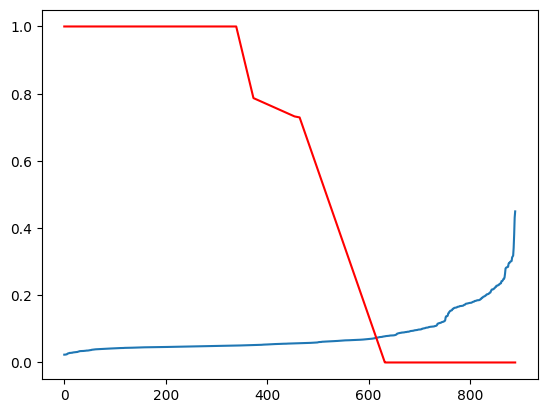

In [133]:
plt.plot(ss.new_prediction)
plt.plot(ss.opt_pred/100,color="red")
plt.show()

In [134]:
# lets reorder the list using the real index

ss=ss.sort_values('index',ascending=True)
ss=ss.reset_index(drop=True)

In [135]:
# lets change the name of predicted column

ss.rename(columns = {'new_prediction':'pred'}, inplace=True)
ss

,index,pred,p2,opt_pred,likely_inc
0,0,0.049144,33.963116,100.000000,115.349329
1,1,0.046903,34.414837,100.000000,118.438098
2,2,0.045228,34.766129,100.000000,120.868372
3,3,0.047887,34.213829,100.000000,117.058606
4,4,0.045177,34.777176,100.000000,120.945190
...,...,...,...,...,...
885,885,0.034058,37.481976,100.000000,140.489844
886,886,0.045075,34.798874,100.000000,121.096167
887,887,0.066045,31.096601,31.273291,30.241228
888,888,0.052913,33.246708,77.474890,85.636376


In [136]:
# lets save the result

ss[['index', 'pred', 'opt_pred']].to_csv('submission.csv', index=False)